# **Introduction**
### **Author :** Walid Atef Abd El Maqsoud Nossier
### **Topic :** Data Science & Business Analytics
### **Task :** Task 1 - Predection Using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied

# **Step 1**
### **Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Step 2**
### **Reading data from remote link**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Step 3**
### **Plotting the distribution of scores**

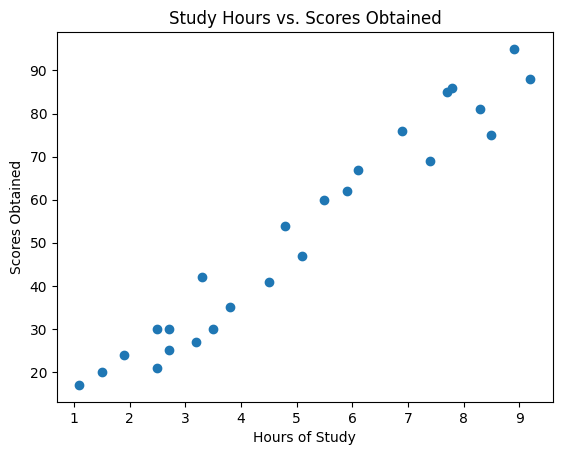

In [3]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours of Study')
plt.ylabel('Scores Obtained')
plt.title('Study Hours vs. Scores Obtained')
plt.show()

# **Step 4**
### **Getting the data ready for training & testing**
Spliting the data into 80% training and 20% testing

In [4]:
X = data.iloc[:, :-1].values   # Features (Hours of Study)
y = data.iloc[:, 1].values  # Target variable (Scores Obtained)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Step 5**
### **Check if all the data is obtained correctly**

In [5]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [6]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [7]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [8]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# **Step 5**
### **Fitting the data into the model**

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Step 6**
### **Predict the marks for the given data**

In [10]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_test]})
prediction

,Hours,Predicted Marks
0,1.5,20
1,3.2,27
2,7.4,69
3,2.5,30
4,5.9,62


# **Step 7**
### **Comparing the actual and predicted marks**

In [11]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Step 8**
### **Visually Comparing the actual and predicted marks**

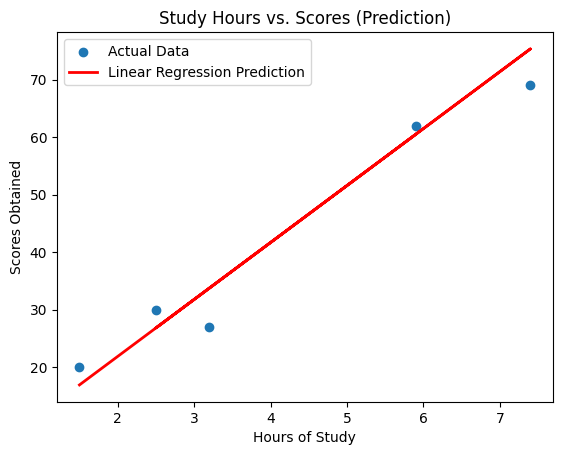

In [12]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.xlabel('Hours of Study')
plt.ylabel('Scores Obtained')
plt.title('Study Hours vs. Scores (Prediction)')
plt.legend()
plt.show()

# **Step 9**
### **Calculating the accuracy of the model**

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 4.18
Mean Squared Error: 21.60
Root Mean Squared Error: 4.65


# **Step 10**
### **Predicting the Score of a student who studied 9.25 Hours**

In [14]:
hours = [9.25]
answer = model.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


*According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.*